---
**Understanding the dataset**

The dataset has 13 columns, namely -
```
- DexNum : index value (not needed)
- Name   : name of the pokemon (not needed)
- HP     : health points (not needed)
- phATk  : physical attack (not needed)
- phDef  : physical defense
- spAtk  : special attack (not needed)
- spDef  : special defense (not needed)
- speed  : speed 
- BST    : base stat total (not needed)
- Type1  : first type
- Type2  : second type
- Abil1  : first ability (not needed)
- Abil2  : second ability (not needed)
```
each row contains a value that belongs to a class [1, 2 or 3].

In [1]:
import pandas as pd

df = pd.read_csv("pokedex.csv")
print(df.shape)
df.head()

(386, 13)


,DexNum,Name,HP,phAtk,phDef,spAtk,spDef,speed,BST,Type1,Type2,Abil1,Abil2
0,1,BULBASAUR,45,49,49,65,65,45,318,GRASS,...,OVERGROW,...
1,2,IVYSAUR,60,62,63,80,80,60,405,GRASS,POISON,OVERGROW,...
2,3,VENUSAUR,80,82,83,100,100,80,525,GRASS,POISON,OVERGROW,...
3,4,CHARMANDER,39,52,43,60,50,65,309,FIRE,...,BLAZE,...
4,5,CHARMELEON,58,64,58,80,65,80,405,FIRE,...,BLAZE,...


---
Q1. Discard all the columns which are not needed

In [2]:
# write your code here
df = df[["phDef", "speed", "Type1", "Type2"]]

print(df.shape)
df.head()

(386, 4)


,phDef,speed,Type1,Type2
0,49,45,GRASS,...
1,63,60,GRASS,POISON
2,83,80,GRASS,POISON
3,43,65,FIRE,...
4,58,80,FIRE,...


---
Q2. Keep only those rows which are either `Rock` type or `Psychic` type (check both type1 & type2).

In [3]:
# write your code here
df = df[(df["Type1"].isin(["ROCK", "PSYCHIC"])) | 
        (df["Type2"].isin(["ROCK", "PSYCHIC"]))]

print(df.shape)
df.head()

(61, 4)


,phDef,speed,Type1,Type2
11,50,70,BUG,PSYCHIC
25,55,100,ELECTRIC,PSYCHIC
37,75,100,FIRE,PSYCHIC
53,48,55,WATER,PSYCHIC
54,78,85,WATER,PSYCHIC


---
Q3. Prepare the data for KNN model by converting each row to a Point
- values = [phDef, speed]
- label = {Rock / Psychic} based on the typing of the Pokemon
and your df into a list of Points.

In [5]:
from KNN_module import Point

points = []
for i in range(len(df)):
    x = df.iloc[i]['phDef']
    y = df.iloc[i]['speed']
    label = df.iloc[i]['Type1']
    if(label != 'ROCK' and label != 'PSYCHIC'):
        label = df.iloc[i]['Type2']
    points.append(Point([x, y], label))

print(type(points[0]))

<class 'KNN_module.Point'>


---
Q4. Prepare Split your dataset saving 75% of data for the training and train your KNN model.

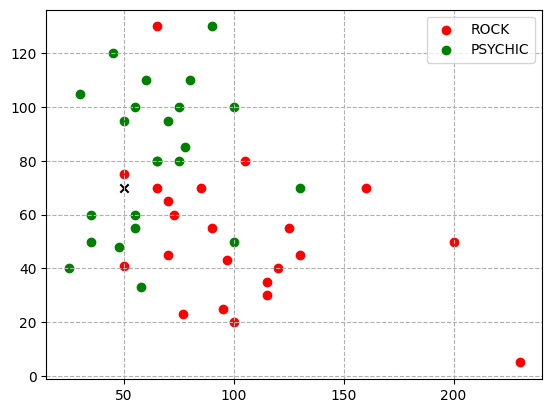

'ROCK'

In [16]:
from sklearn.model_selection import train_test_split
from KNN_module import KNN

train_pts, test_pts = train_test_split(points, test_size=0.25, random_state=42)

knn = KNN(k=3)
knn.update_points(train_pts)
knn.predict(test_pts[0], plot = True)

---
Q5. Evalute the confusion matrix by testing your model against the testing dataset

[[5, 1], [4, 6]]


Text(0.5, 1.0, 'Confusion Matrix')

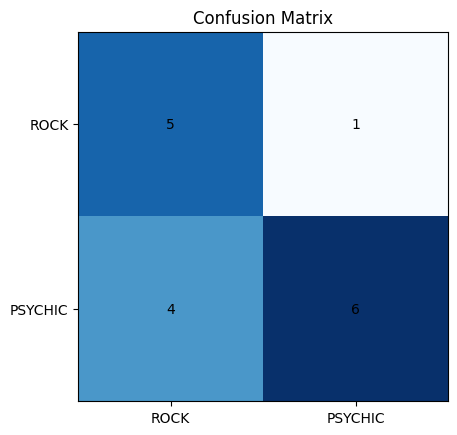

In [17]:
import matplotlib.pyplot as plt

matrix = [[0, 0], [0, 0]]
classes = ["ROCK", "PSYCHIC"]
for pt in test_pts:
    actual_label = pt.label
    predicted_label = knn.predict(pt)
    matrix[classes.index(actual_label)][classes.index(predicted_label)] += 1

print(matrix)

fig, ax = plt.subplots()
ax.imshow(matrix, cmap='Blues')
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(classes)
ax.set_yticklabels(classes)
for i in range(2):
    for j in range(2):
        ax.text(j, i, matrix[i][j], ha='center', va='center', color='k')
ax.set_title("Confusion Matrix")


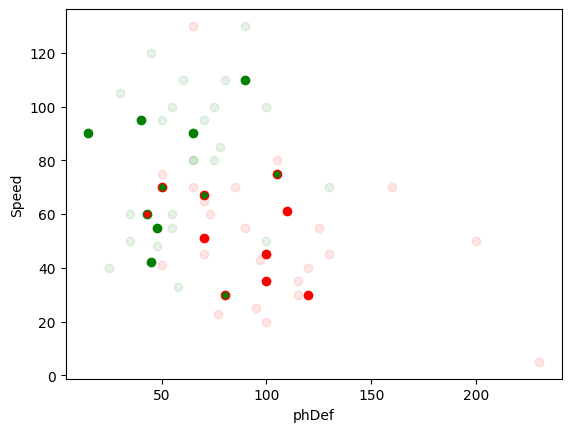

In [18]:
color = {'ROCK' : 'r', 'PSYCHIC' : 'g'}

for pt in train_pts:
    plt.scatter(pt.vals[0], pt.vals[1], c=color[pt.label], alpha=0.1)

for pt in test_pts:
    actual_label = pt.label
    predicted_label = knn.predict(pt)
    plt.scatter(pt.vals[0], pt.vals[1], c=color[pt.label], edgecolors=color[predicted_label], alpha=1)

plt.ylabel("Speed")
plt.xlabel("phDef")
plt.show()

---
Q6. Calculate the following using the confusion matrix:
- Accuracy of the model
- Precision for classifying Rock types
- Recall for classifying Rock types
- Precision for classifying Psychic types
- Recall for classifying Psychic types

In [38]:
TrueRock = matrix[0][0]
TruePsychic = matrix[1][1]
FalseRock = matrix[1][0]
FalsePsychic = matrix[0][1]

print(f"{TrueRock = }")
print(f"{TruePsychic = }")
print(f"{FalseRock = }")
print(f"{FalsePsychic = }")

Accuracy = round((TrueRock + TruePsychic) / (TrueRock + TruePsychic + FalseRock + FalsePsychic), 4)
print(f"\n{Accuracy         = }")

RockPrecision = round((TrueRock) / (TrueRock + FalseRock), 4)
RockRecall = round((TrueRock) / (TrueRock + FalsePsychic), 4)
print(f"{RockPrecision    = }")
print(f"{RockRecall       = }")

PsychicPrecision = round((TruePsychic) / (TruePsychic + FalsePsychic), 4)
PsychicRecall = round((TruePsychic) / (TruePsychic + FalseRock), 4)
print(f"{PsychicPrecision = }")
print(f"{PsychicRecall    = }")


TrueRock = 5
TruePsychic = 6
FalseRock = 4
FalsePsychic = 1

Accuracy         = 0.6875
RockPrecision    = 0.5556
RockRecall       = 0.8333
PsychicPrecision = 0.8571
PsychicRecall    = 0.6
